Importing modules

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

Reading csv's

In [92]:
test = pd.read_csv("CSV/data_test.csv")
train = pd.read_csv("CSV/data_train.csv")
print(test.shape)
print(train.shape)

(16281, 15)
(32561, 15)


Merging csv's

In [93]:
df = pd.concat([test, train])
print(df.shape)

(48842, 15)


Exploring the data

In [94]:
# print(df.isna().sum())
# for column in df.columns:
#     print_unique_values_from_columns(df, column)

Exploring numerical data

In [95]:
# numerical_columns = ["age","fnlwgt","capital-loss","capital-gain","hours-per-week","income"]
# sns.heatmap(data=df[numerical_columns].corr(),cmap="RdYlGn", annot=True, vmin=-1)

Dropping columns based on findings

In [96]:
# df = df.drop(["fnlwgt"], axis=1)
# df.reset_index(drop=True, inplace=True)

Exploring data - plotting everything vs target

In [97]:
# feature_columns = df.columns[:-5]
# print(feature_columns)
# for feature_column in feature_columns:
#     df1 = df[[feature_column, "income"]].pivot(columns="income", values=feature_column)
#     df1.columns = ["<=50K", ">50k"]
#     df1.plot.hist(stacked=True, bins=np.arange(df[feature_column].min()-0.5,df[feature_column].max()+1))
#     plt.xticks(np.arange(df[feature_column].min(), df[feature_column].max()+1))
#     plt.xlabel(feature_column)
#     plt.title(f"Comparing income to {feature_column}")
#     plt.show()

Performing train_test_split

In [98]:
y_train = train["income"].values
X_train_unnormalized = train.drop(["income"], axis=1).values

y_test = test["income"].values
X_test_unnormalized = test.drop(["income"], axis=1).values

Scaling the data

In [99]:
X_train = normalizing_array(X_train_unnormalized)
X_test = normalizing_array(X_test_unnormalized)

Checking baseline accuracy with RandomForestClassifier-model

In [100]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
predict_score = forest.score(X_test, y_test)
y_pred = forest.predict(X_test)
print(predict_score)

0.8013267405792205
0.7963270069406057


Checking the metrics

In [101]:
cross_val_score = cross_val_score(forest, X_train, y_train, cv=100)
print("Accuracy: {:.2f}% (+/- {:.2f})".format(cross_val_score.mean() * 100, cross_val_score.std() * 100))

Accuracy: 79.45% (+/- 1.28)


              precision    recall  f1-score   support

           0       0.79      0.99      0.88     12435
           1       0.88      0.16      0.27      3846

    accuracy                           0.80     16281
   macro avg       0.84      0.58      0.58     16281
weighted avg       0.81      0.80      0.74     16281



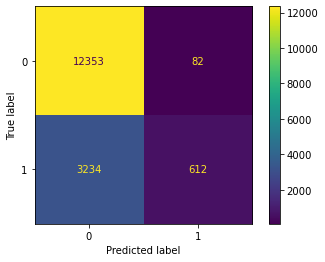

In [102]:
print(classification_report(y_test, y_pred, ))
plot_confusion_matrix(forest, X_test, y_test)
plt.show()